In [1]:
from google.colab import files
uploaded = files.upload()

Saving cleaned.csv to cleaned.csv


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:41: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


[0 0 0 ... 0 0 1]
F1 score: 0.6102133160956691
precision score: 0.6090322580645161
recall score: 0.6113989637305699
accuracy 0.8148034398034398
0        0
1        0
2        0
3        0
4        0
        ..
32555    0
32556    1
32557    0
32558    0
32559    1
Name:  <=50K, Length: 32560, dtype: int64


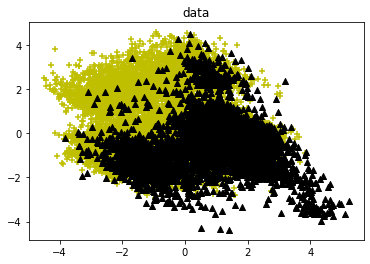

[0 0 0 ... 0 0 1]


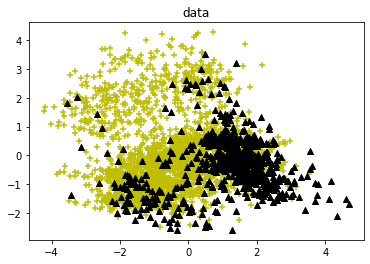

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib.colors import ListedColormap
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import make_gaussian_quantiles

def splitData(X,Y):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1, random_state=0)
    Y_train = np.expand_dims(Y_train, 1)
    Y_test = np.expand_dims(Y_test, 1)
    return X_train, X_test, Y_train, Y_test

def pca(X):
    pca = PCA(n_components=2)
    X_new = pca.fit_transform(X)
    return X_new

def visualize(X,Y):
    print(Y)
    plt.scatter(X[:,0][Y == 0], X[:,1][Y == 0], c='y', marker='+')
    plt.scatter(X[:,0][Y == 1], X[:,1][Y == 1], c='k', marker='^')
    plt.title("data")
    plt.savefig("data.png")
    plt.show()


data = pd.read_csv("cleaned.csv")

mapping = { ' <=50K': 0, ' >50K': 1 }
Y = data[' <=50K'].map(mapping) 

X = data.drop(' <=50K',1).to_numpy()

X_train, X_test, Y_train, Y_test = splitData(X,Y)
mean = np.mean(X,axis=0)
std = np.std(X,axis=0)

X_train = (X_train - mean) / std
X_test = (X_test - mean) / std
X = (X - mean) / std

dtree = DecisionTreeClassifier()
dtree.fit(X_train, Y_train)
pred_test = dtree.predict(X_test)
print(pred_test)

print("F1 score:", f1_score(pred_test, Y_test))
print("precision score:", precision_score(pred_test, Y_test))
print("recall score:", recall_score(pred_test, Y_test))
print("accuracy", accuracy_score(pred_test, Y_test))

X_new = pca(X)
visualize(X_new,Y)

visualize(pca(X_test),pred_test)